### Part 1

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

In [75]:
df = pd.read_json('logins.json')
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [76]:
resampled_login_15m = df['login_time'].value_counts().resample('15T').sum().fillna(0).reset_index()
resampled_login_15m.columns = ['timestamp', 'count']

In [77]:
resampled_login_15m.head()

,timestamp,count
0,1970-01-01 20:00:00,2.0
1,1970-01-01 20:15:00,6.0
2,1970-01-01 20:30:00,9.0
3,1970-01-01 20:45:00,7.0
4,1970-01-01 21:00:00,1.0


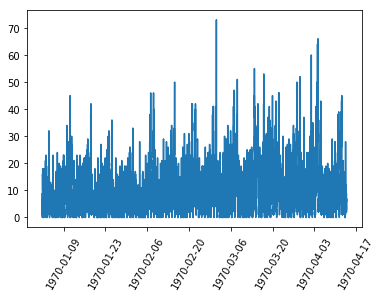

In [53]:
plt.plot(resampled_login_15m['timestamp'], resampled_login_15m['count'])
plt.xticks(rotation = 60)
plt.show()

In [157]:
login_by_time = resampled_login_15m.loc[:,['timestamp','count']].copy()
login_by_time['timestamp'] = login_by_time['timestamp'].dt.time
login_by_time = login_by_time.groupby('timestamp').sum()
login_by_time.head()

,count
timestamp,
00:00:00,1439.0
00:15:00,1547.0
00:30:00,1525.0
00:45:00,1482.0
01:00:00,1549.0


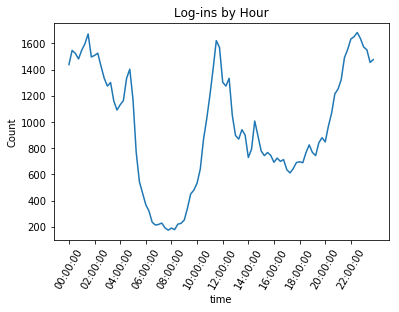

In [173]:
x_label = [(datetime.datetime.combine(datetime.date.today(),datetime.time(0,0,0)) + x*datetime.timedelta(hours = 2)).time() for x in range(12)]
plt.plot(login_by_time.index,login_by_time['count'])
plt.xticks(x_label, rotation = 60)
plt.ylabel('Count')
plt.title('Log-ins by Hour')
plt.show()

Upon resampling the log-in timestamps by time alone, it becomes apparent that user log-ins follow a daily cycle. A period of increasing activity starts at 20:00 and reaches a peak of 1,600 at about 22:00. This peak is maintained until about 2:00 and declines slightly to 1200 at around 4:00 before increasing to 1400 until around 5:00. Afterwards, there is a sharp constant decline in log-ins reaching a minima of 200 at 7:00 before sharply climbing again to reach a peak at 1600 at 11:00. Log-ins then fall off gradually and reach a low of 800 at about 16:00.

Considering the data spans from January to April, there is insufficient data to comment on the seasonality of the demand. Furthermore, the peak times seem uncharacteristic of typical human activity suggesting the timestamps are not in the local time zone

In [139]:
def is_bday(date):
    return bool(len(pd.bdate_range(date, date)))

In [140]:
resampled_login_15m['bday'] = resampled_login_15m['timestamp'].apply(is_bday)

In [163]:
login_by_time_bday = resampled_login_15m[resampled_login_15m['bday']==True].loc[:,['timestamp','count']].copy()
login_by_time_bday['timestamp'] = login_by_time_bday['timestamp'].dt.time
login_by_time_bday = login_by_time_bday.groupby('timestamp').sum()
login_by_time_bday.head()

,count
timestamp,
00:00:00,882.0
00:15:00,944.0
00:30:00,915.0
00:45:00,875.0
01:00:00,913.0


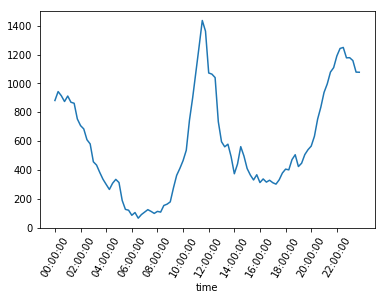

In [165]:
x_label = [(datetime.datetime.combine(datetime.date.today(),datetime.time(0,0,0)) + x*datetime.timedelta(hours = 2)).time() for x in range(12)]
plt.plot(login_by_time_bday.index,login_by_time_bday['count'])
plt.xticks(x_label, rotation = 60)
plt.show()

In [166]:
login_by_time_hday = resampled_login_15m[resampled_login_15m['bday']==False].loc[:,['timestamp','count']].copy()
login_by_time_hday['timestamp'] = login_by_time_hday['timestamp'].dt.time
login_by_time_hday = login_by_time_hday.groupby('timestamp').sum()
login_by_time_hday.head()

,count
timestamp,
00:00:00,557.0
00:15:00,603.0
00:30:00,610.0
00:45:00,607.0
01:00:00,636.0


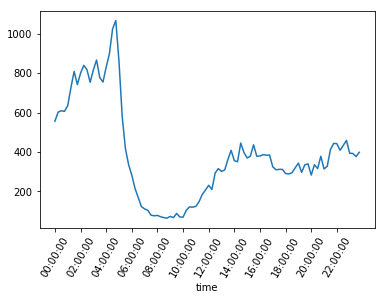

In [167]:
x_label = [(datetime.datetime.combine(datetime.date.today(),datetime.time(0,0,0)) + x*datetime.timedelta(hours = 2)).time() for x in range(12)]
plt.plot(login_by_time_hday.index,login_by_time_hday['count'])
plt.xticks(x_label, rotation = 60)
plt.show()

If the year data is accurate, we can break down the days into business days and holidays. It appears that the daily cycle of these two categories are significantly different

### Part 2



#### 1. 
The metric I would choose is the proportion of drivers active in both cities. I would choose this as the measure of success because it must closely reflects the improvement that the city operations managers desire. For a driver to be active in both cities, I believe a driver needs to have a minimum proportion of rides in each city. For example, if a driver has at least 25% of rides in each city, he or she can be considered active in both locations. The exact ratio can be based on how much increased driver availability is needed.

#### 2.

I would implement the experiment by first randomly selecting an experimental group from the driver populations of both cities. This group should be sufficiently large such that the results can be generalized to the entire population; given the option, I would select 10% of the drivers in both cities to be enrolled in the toll-free program.

I would use a difference in proportion test to deterimine the significance of the experiment. My null hypothesis would be that there is no difference in proportion of drivers active in both locations between the driver population and the toll-free group. The alternative hypothesis is that there is a difference in the proportions. After running the experiment for an appropriately long period of time (a month or longer), the difference in proportion of drivers active in both cities between the control group and the experimental group can be found. To determine whether this difference is significant, we first find the z-score of the difference. The difference in proportion of our null hypothesis is 0 and the standard deviation is square root of p(1-p)/ n-control + p(1-p) / n-exp. Under the null hypothesis, p = n-twocity/n-totaldrivers. Once we get the z-score, we can determine the chance of getting this z-score under the null hypothesis of difference in proportions. If this chance is below our signifance level (standard of .05) we can report this program as creating a statistically significant difference.

Based on the results, I could suggest to the team whether or not to try this experiment. I would provide the caveat of the significance level; if this needs to be a surefire success the significance level could be decreased before providing a result or if the team is interested in any possibility that has a strong chance of working the significance level could be increased. There could be external factors during the program that were not controlled for as well, so any notable events during this time period should be noted

### Part 3

test = pd.read_json('ultimate_data_challenge.json', orient = 'records')

In [195]:
#importing data
import json
with open('ultimate_data_challenge.json') as datafile:
    for line in datafile:
        data = json.loads(line)
users = pd.DataFrame(data)
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [196]:
#converting date columns from str to datetime
users['last_trip_date'] = pd.to_datetime(users['last_trip_date'])
users['signup_date'] = pd.to_datetime(users['signup_date'])

pandas.tslib.Timestamp

In [206]:
#find when data was pulled
data_pull_date = users.loc[:,'last_trip_date'].max()

In [210]:
# determining if user is active
users['active'] =  (data_pull_date - pd.Timedelta('30 days')) < users['last_trip_date']

I categorize a user as active if they used the service 30 days from the last ride date (July 1st) in the data set.

I check to see if the missing values appear to be randomly distributed amongst riders. Based on the summary statistics, this appears to be the case, and I fill in the missing values with the average of the ratings. Perhaps there is a commonality between users with missing ratings that is not revealed by the summary statistics, so this possiblity should be kept in mind.

In [214]:
users.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [218]:
users[users['avg_rating_by_driver'].isnull()].describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,201.000000,0.0,134.000000,201.000000,201.000000,201.000000,201.000000
mean,6.167164,NaN,4.526119,1.165821,15.754726,0.552239,53.233831
std,12.259533,NaN,0.930513,0.471684,36.370207,0.537129,50.019897
min,0.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.980000,NaN,4.000000,1.000000,0.000000,0.000000,0.000000
50%,3.360000,NaN,5.000000,1.000000,0.000000,1.000000,100.000000
75%,6.370000,NaN,5.000000,1.000000,0.000000,1.000000,100.000000
max,160.960000,NaN,5.000000,4.000000,100.000000,2.000000,100.000000


In [219]:
users[users['avg_rating_of_driver'].isnull()].describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,8122.000000,8055.000000,0.0,8122.000000,8122.000000,8122.000000,8122.000000
mean,7.506267,4.785984,NaN,1.078210,8.548067,0.593327,59.050948
std,7.758616,0.622122,NaN,0.310306,26.578461,0.606755,46.859739
min,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,2.410000,5.000000,NaN,1.000000,0.000000,0.000000,0.000000
50%,4.715000,5.000000,NaN,1.000000,0.000000,1.000000,100.000000
75%,10.720000,5.000000,NaN,1.000000,0.000000,1.000000,100.000000
max,160.960000,5.000000,NaN,5.000000,100.000000,5.000000,100.000000


In [228]:
users_filledna = users.copy()
users_filledna['avg_rating_by_driver']=users_filledna['avg_rating_by_driver'].fillna(users['avg_rating_by_driver'].mean())
users_filledna['avg_rating_of_driver']=users_filledna['avg_rating_of_driver'].fillna(users['avg_rating_of_driver'].mean())
users_filledna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [242]:
len(users_filledna[users_filledna['active']==True])/len(users_filledna)

0.3662

Below I graph the histograms for each variable for the entire data set, active users, and inactive users. The variable with the largest difference between active and inactive users is the ultimate_black_user flag. 36.6% of users are active.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


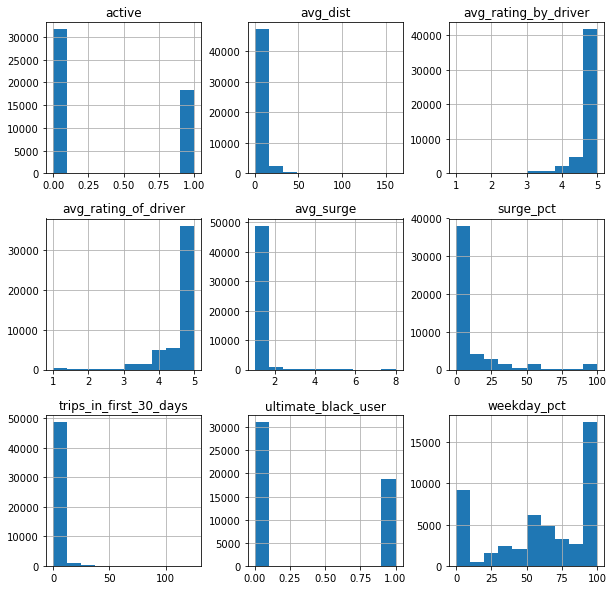

In [235]:
figure = plt.figure(figsize = (10,10))
axes = figure.gca()
users_filledna.hist(ax = axes)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


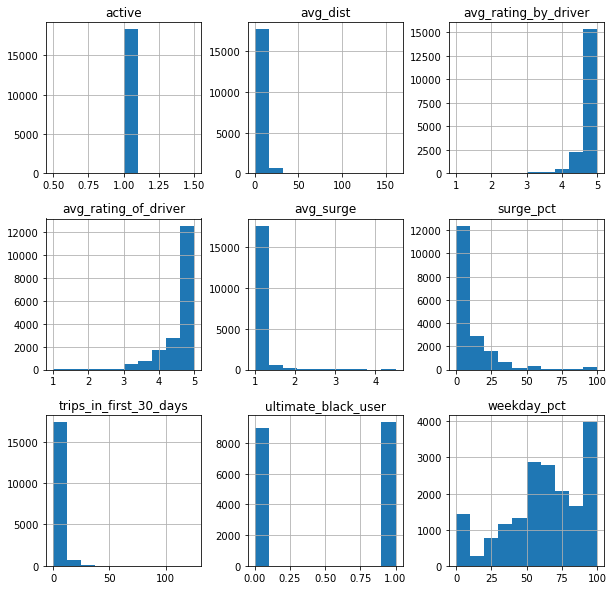

In [237]:
figure = plt.figure(figsize = (10,10))
axes = figure.gca()
users_filledna[users_filledna['active'] == True].hist(ax = axes)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


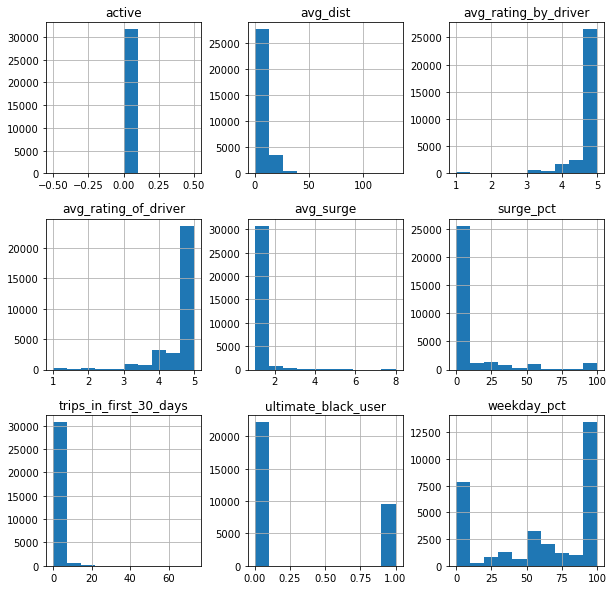

In [238]:
figure = plt.figure(figsize = (10,10))
axes = figure.gca()
users_filledna[users_filledna['active'] == False].hist(ax = axes)
plt.show()

In [298]:
#scaling non-categorical variables
from sklearn.preprocessing import StandardScaler

scaled_cols = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge', 'surge_pct','trips_in_first_30_days','weekday_pct']
scaled_features = users_filledna.copy()[scaled_cols]
scaler = StandardScaler().fit(scaled_features)
users_scaled = users_filledna.copy()
users_scaled[scaled_cols] = scaler.transform(scaled_features)
users_scaled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-2.558398e-17,4.787948e-16,8.195219e-16,6.134493e-16,8.276602e-16,-8.546253e-16,1.350848e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.015686e+00,-8.475984e+00,-6.374769e+00,-3.362683e-01,-4.433944e-01,-6.006888e-01,-1.643048e+00
25%,-5.916680e-01,-1.753414e-01,-1.797602e-01,-3.362683e-01,-4.433944e-01,-6.006888e-01,-7.450173e-01
50%,-3.358553e-01,4.976836e-01,1.742403e-01,-3.362683e-01,-4.433944e-01,-3.370206e-01,1.557103e-01
75%,2.003002e-01,4.976836e-01,7.052411e-01,-1.113812e-01,-1.250267e-02,1.903157e-01,1.053741e+00
max,2.718679e+01,4.976836e-01,7.052411e-01,3.114793e+01,4.566974e+00,3.235783e+01,1.053741e+00


In [299]:
X = users_scaled.loc[:,['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge', 'surge_pct','trips_in_first_30_days','ultimate_black_user', 'weekday_pct']]
y = users_scaled['active']

In [300]:
from sklearn.model_selection import train_test_split
X_traincv, X_test, y_traincv, y_test = train_test_split(X,y, test_size = .2, random_state = 3)
X_train, X_cv, y_train, y_cv = train_test_split(X_traincv, y_traincv, test_size = .25, random_state = 3)

#### Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR = modelLR.fit(X_train,y_train)
accuracy_score(modelLR.predict(X_test),y_test)

0.67549999999999999

results = pd.DataFrame(y_test)
results['prediction']=(modelLR.predict(X_test))
results

In [304]:
from sklearn.model_selection import KFold

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, cv in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x.iloc[train], y.iloc[train]) # fit
        result += score_func(clf.predict(x.iloc[cv]), y.iloc[cv]) # evaluate score function on held-out data
    return result / nfold # average

Cs = [0.001, .05, 0.1, .5, 1, 5, 10]
for c in Cs:
    clf = LogisticRegression(C = c)
    print((c,cv_score(clf,X_traincv,y_traincv)))


(0.001, 0.67679999999999996)
(0.05, 0.68302499999999999)
(0.1, 0.6828749999999999)
(0.5, 0.68305000000000005)
(1, 0.68302499999999999)
(5, 0.68302499999999999)
(10, 0.68302499999999999)


In [305]:
modelCV = LogisticRegression(C = .5)
modelCV.fit(X_traincv,y_traincv)
accuracy_score(modelCV.predict(X_test),y_test)

0.67549999999999999

params = {'C':(.01,.05,.1,.5,1)}
modelLR = LogisticRegression()
gs = GridSearchCV(modelLR, params)
gs.fit(X_traincv,y_traincv)
modelLRgs = LogisticRegression(C = gs.best_params_['C'])
modelLRgs.fit(X_traincv,y_traincv)
print(gs.best_params_['C'],accuracy_score(modelLRgs.predict(X_test),y_test))

#### K-NN

In [310]:
import sklearn.neighbors as neighbors
neigh = neighbors.KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,y_train)
accuracy_score(neigh.predict(X_test),y_test)

0.72030000000000005

In [321]:
ks = range(11,35)
for k in ks:
    neigh = neighbors.KNeighborsClassifier(n_neighbors = k)
    print((k,cv_score(neigh,X_traincv,y_traincv)), accuracy_score(neigh.predict(X_test),y_test))


(11, 0.72474999999999989) 0.7304
(12, 0.72704999999999997) 0.7318
(13, 0.7288) 0.7335
(14, 0.72915000000000008) 0.7368
(15, 0.72870000000000013) 0.7393
(16, 0.730325) 0.7374
(17, 0.72977500000000006) 0.739
(18, 0.73087499999999994) 0.7392
(19, 0.730325) 0.7413
(20, 0.73055000000000003) 0.7401
(21, 0.72942499999999999) 0.7396
(22, 0.73069999999999991) 0.7387
(23, 0.73102500000000004) 0.7388
(24, 0.73097499999999993) 0.738
(25, 0.73157499999999998) 0.7398
(26, 0.73120000000000007) 0.7399
(27, 0.73182499999999995) 0.7398
(28, 0.73147499999999999) 0.7388
(29, 0.732325) 0.7379
(30, 0.73227500000000001) 0.7375
(31, 0.73177499999999995) 0.74
(32, 0.73182499999999995) 0.7377
(33, 0.73194999999999999) 0.7393
(34, 0.7322249999999999) 0.7379


#### Random Forest

In [322]:
import sklearn.ensemble as ensemble
modelRF = ensemble.RandomForestClassifier()
modelRF.fit(X_traincv,y_traincv)
accuracy_score(modelRF.predict(X_test),y_test)

0.70650000000000002

In [325]:
nums = [5,10,20,40,50,60,70,80,90,100]
for n in nums:
    modelRF = ensemble.RandomForestClassifier(n_estimators = n)
    print((n,cv_score(modelRF,X_traincv,y_traincv)), accuracy_score(modelRF.predict(X_test),y_test))

(5, 0.70137499999999997) 0.7073
(10, 0.71127499999999999) 0.7078
(20, 0.71517500000000001) 0.7122
(40, 0.71702500000000002) 0.7095
(50, 0.71960000000000002) 0.7153
(60, 0.71872499999999995) 0.7178
(70, 0.71824999999999994) 0.7172
(80, 0.71854999999999991) 0.7193
(90, 0.71889999999999998) 0.7166
(100, 0.7181749999999999) 0.7162
